### Classifiers using Decision Tree and Random Forest


##### This program uses the dataset "application_train.csv"available at "https://www.kaggle.com/c/home-credit-default-risk/data"


##### Data Preparation

In [1]:
#inporting necessary libraries

import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
import numpy as np
from sklearn.ensemble import RandomForestClassifier 
from sklearn.inspection import plot_partial_dependence

In [2]:
# Setting the dataset filepath

os.chdir("/Users/ratulnandy/Documents/GitHub/assignment_1-1-ratul-nandy/Module_2")
df_train_wh = pd.read_csv('application_train.csv')

In [3]:
# Label Encoding non-numeric data

le_NAME_CONTRACT_TYPE = LabelEncoder()
le_CODE_GENDER = LabelEncoder()
le_FLAG_OWN_CAR = LabelEncoder()
le_FLAG_OWN_REALTY = LabelEncoder()
le_NAME_TYPE_SUITE = LabelEncoder()
le_NAME_INCOME_TYPE = LabelEncoder()
le_NAME_EDUCATION_TYPE = LabelEncoder()
le_NAME_FAMILY_STATUS = LabelEncoder()
le_NAME_HOUSING_TYPE = LabelEncoder()
le_OCCUPATION_TYPE = LabelEncoder()
le_WEEKDAY_APPR_PROCESS_START = LabelEncoder()
le_ORGANIZATION_TYPE = LabelEncoder()
le_FONDKAPREMONT_MODE = LabelEncoder()
le_HOUSETYPE_MODE = LabelEncoder()
le_WALLSMATERIAL_MODE = LabelEncoder()
le_EMERGENCYSTATE_MODE = LabelEncoder()

In [4]:
df_train_wh['NAME_CONTRACT_TYPE_n'] = le_NAME_CONTRACT_TYPE.fit_transform(df_train_wh['NAME_CONTRACT_TYPE'])
df_train_wh['CODE_GENDER_n'] = le_CODE_GENDER.fit_transform(df_train_wh['CODE_GENDER'])
df_train_wh['FLAG_OWN_CAR_n'] = le_FLAG_OWN_CAR.fit_transform(df_train_wh['FLAG_OWN_CAR'])
df_train_wh['FLAG_OWN_REALTY_n'] = le_FLAG_OWN_REALTY.fit_transform(df_train_wh['FLAG_OWN_REALTY'])
# Replacing missing data with 'NaN'
df_train_wh["NAME_TYPE_SUITE"].fillna("NaN", inplace = True)
df_train_wh['NAME_TYPE_SUITE_n'] = le_NAME_TYPE_SUITE.fit_transform(df_train_wh['NAME_TYPE_SUITE'])
df_train_wh['NAME_INCOME_TYPE_n'] = le_NAME_INCOME_TYPE.fit_transform(df_train_wh['NAME_INCOME_TYPE'])
df_train_wh['NAME_EDUCATION_TYPE_n'] = le_NAME_EDUCATION_TYPE.fit_transform(df_train_wh['NAME_EDUCATION_TYPE'])
df_train_wh['NAME_FAMILY_STATUS_n'] = le_NAME_FAMILY_STATUS.fit_transform(df_train_wh['NAME_FAMILY_STATUS'])
df_train_wh['NAME_HOUSING_TYPE_n'] = le_NAME_HOUSING_TYPE.fit_transform(df_train_wh['NAME_HOUSING_TYPE'])
# Replacing missing data with 'NaN'
df_train_wh["OCCUPATION_TYPE"].fillna("NaN", inplace = True)
df_train_wh['OCCUPATION_TYPE_n'] = le_OCCUPATION_TYPE.fit_transform(df_train_wh['OCCUPATION_TYPE'])
df_train_wh['WEEKDAY_APPR_PROCESS_START_n'] = le_WEEKDAY_APPR_PROCESS_START.fit_transform(df_train_wh['WEEKDAY_APPR_PROCESS_START'])
df_train_wh['ORGANIZATION_TYPE_n'] = le_ORGANIZATION_TYPE.fit_transform(df_train_wh['ORGANIZATION_TYPE'])
# Replacing missing data with 'NaN'
df_train_wh["FONDKAPREMONT_MODE"].fillna("NaN", inplace = True)
df_train_wh['FONDKAPREMONT_MODE_n'] = le_FONDKAPREMONT_MODE.fit_transform(df_train_wh['FONDKAPREMONT_MODE'])
# Replacing missing data with 'NaN'
df_train_wh["HOUSETYPE_MODE"].fillna("NaN", inplace = True)
df_train_wh['HOUSETYPE_MODE_n'] = le_HOUSETYPE_MODE.fit_transform(df_train_wh['HOUSETYPE_MODE'])
# Replacing missing data with 'NaN'
df_train_wh["WALLSMATERIAL_MODE"].fillna("NaN", inplace = True)
df_train_wh['WALLSMATERIAL_MODE_n'] = le_WALLSMATERIAL_MODE.fit_transform(df_train_wh['WALLSMATERIAL_MODE'])
# Replacing missing data with 'NaN'
df_train_wh["EMERGENCYSTATE_MODE"].fillna("NaN", inplace = True)
df_train_wh['EMERGENCYSTATE_MODE_n'] = le_EMERGENCYSTATE_MODE.fit_transform(df_train_wh['EMERGENCYSTATE_MODE'])

In [5]:
# Creating a clean dataset with only numeric data

df_clean = df_train_wh.drop(['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE','FONDKAPREMONT_MODE','HOUSETYPE_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE'], axis = 'columns')
df_clean = df_clean.replace(np.nan, 0)

In [6]:
#Checking missing value in the dataset
df_clean.isnull().sum()

SK_ID_CURR               0
TARGET                   0
CNT_CHILDREN             0
AMT_INCOME_TOTAL         0
AMT_CREDIT               0
                        ..
ORGANIZATION_TYPE_n      0
FONDKAPREMONT_MODE_n     0
HOUSETYPE_MODE_n         0
WALLSMATERIAL_MODE_n     0
EMERGENCYSTATE_MODE_n    0
Length: 122, dtype: int64

### Building a classificier using decision tree

### Variables chosen :

AMT_INCOME_TOTAL, NAME_CONTRACT_TYPE, AMT_CREDIT, FLAG_OWN_CAR, DAYS_BIRTH, NAME_EDUCATION_TYPE, NAME_INCOME_TYPE, NAME_FAMILY_STATUS, ORGANIZATION_TYPE, AMT_ANNUITY

In [7]:
# Creating a dataset based on variables chosen in Module 1

mydata = df_clean[['TARGET','AMT_INCOME_TOTAL', 'NAME_CONTRACT_TYPE_n', 'AMT_CREDIT', 'FLAG_OWN_CAR_n','DAYS_BIRTH','NAME_EDUCATION_TYPE_n', 'NAME_INCOME_TYPE_n', 'NAME_FAMILY_STATUS_n', 'ORGANIZATION_TYPE_n', 'AMT_ANNUITY']]

In [33]:
# Splitting the dataset into training data and test data

mydata_train, mydata_test = train_test_split(mydata, test_size = 0.25, random_state =42)

# Preparing the training dataset

mydata_train_input = mydata_train.drop(['TARGET'], axis = 'columns')
mydata_train_target = mydata_train[['TARGET']]

# Preparing the testing dataset

mydata_test_input = mydata_test.drop(['TARGET'], axis = 'columns')
mydata_test_target = mydata_test[['TARGET']]


In [9]:
# Fitting the Decision Tree

my_clf = tree.DecisionTreeClassifier(random_state = 42, max_depth = 4)
my_model = my_clf.fit(mydata_train_input, mydata_train_target)


#### Checking the prediction score

In [10]:
# Model prediction test ( Pruning the tree to max depth 4 as there is no increase in the prediction score)

my_model.score(mydata_test_input,mydata_test_target)

0.9194698093082546

#### Visualizing the Tree

[Text(2790.0, 2446.2, 'X[4] <= -14017.5\ngini = 0.149\nsamples = 230633\nvalue = [211999, 18634]'),
 Text(1395.0, 1902.6, 'X[6] <= 5.5\ngini = 0.125\nsamples = 145742\nvalue = [136003, 9739]'),
 Text(697.5, 1359.0, 'X[5] <= 1.5\ngini = 0.106\nsamples = 80059\nvalue = [75546, 4513]'),
 Text(348.75, 815.3999999999999, 'X[1] <= 0.5\ngini = 0.082\nsamples = 18417\nvalue = [17628, 789]'),
 Text(174.375, 271.7999999999997, 'gini = 0.088\nsamples = 16287\nvalue = [15539, 748]'),
 Text(523.125, 271.7999999999997, 'gini = 0.038\nsamples = 2130\nvalue = [2089, 41]'),
 Text(1046.25, 815.3999999999999, 'X[4] <= -19321.5\ngini = 0.114\nsamples = 61642\nvalue = [57918, 3724]'),
 Text(871.875, 271.7999999999997, 'gini = 0.102\nsamples = 39120\nvalue = [37019, 2101]'),
 Text(1220.625, 271.7999999999997, 'gini = 0.134\nsamples = 22522\nvalue = [20899, 1623]'),
 Text(2092.5, 1359.0, 'X[5] <= 2.5\ngini = 0.146\nsamples = 65683\nvalue = [60457, 5226]'),
 Text(1743.75, 815.3999999999999, 'X[8] <= 39.5\ngin

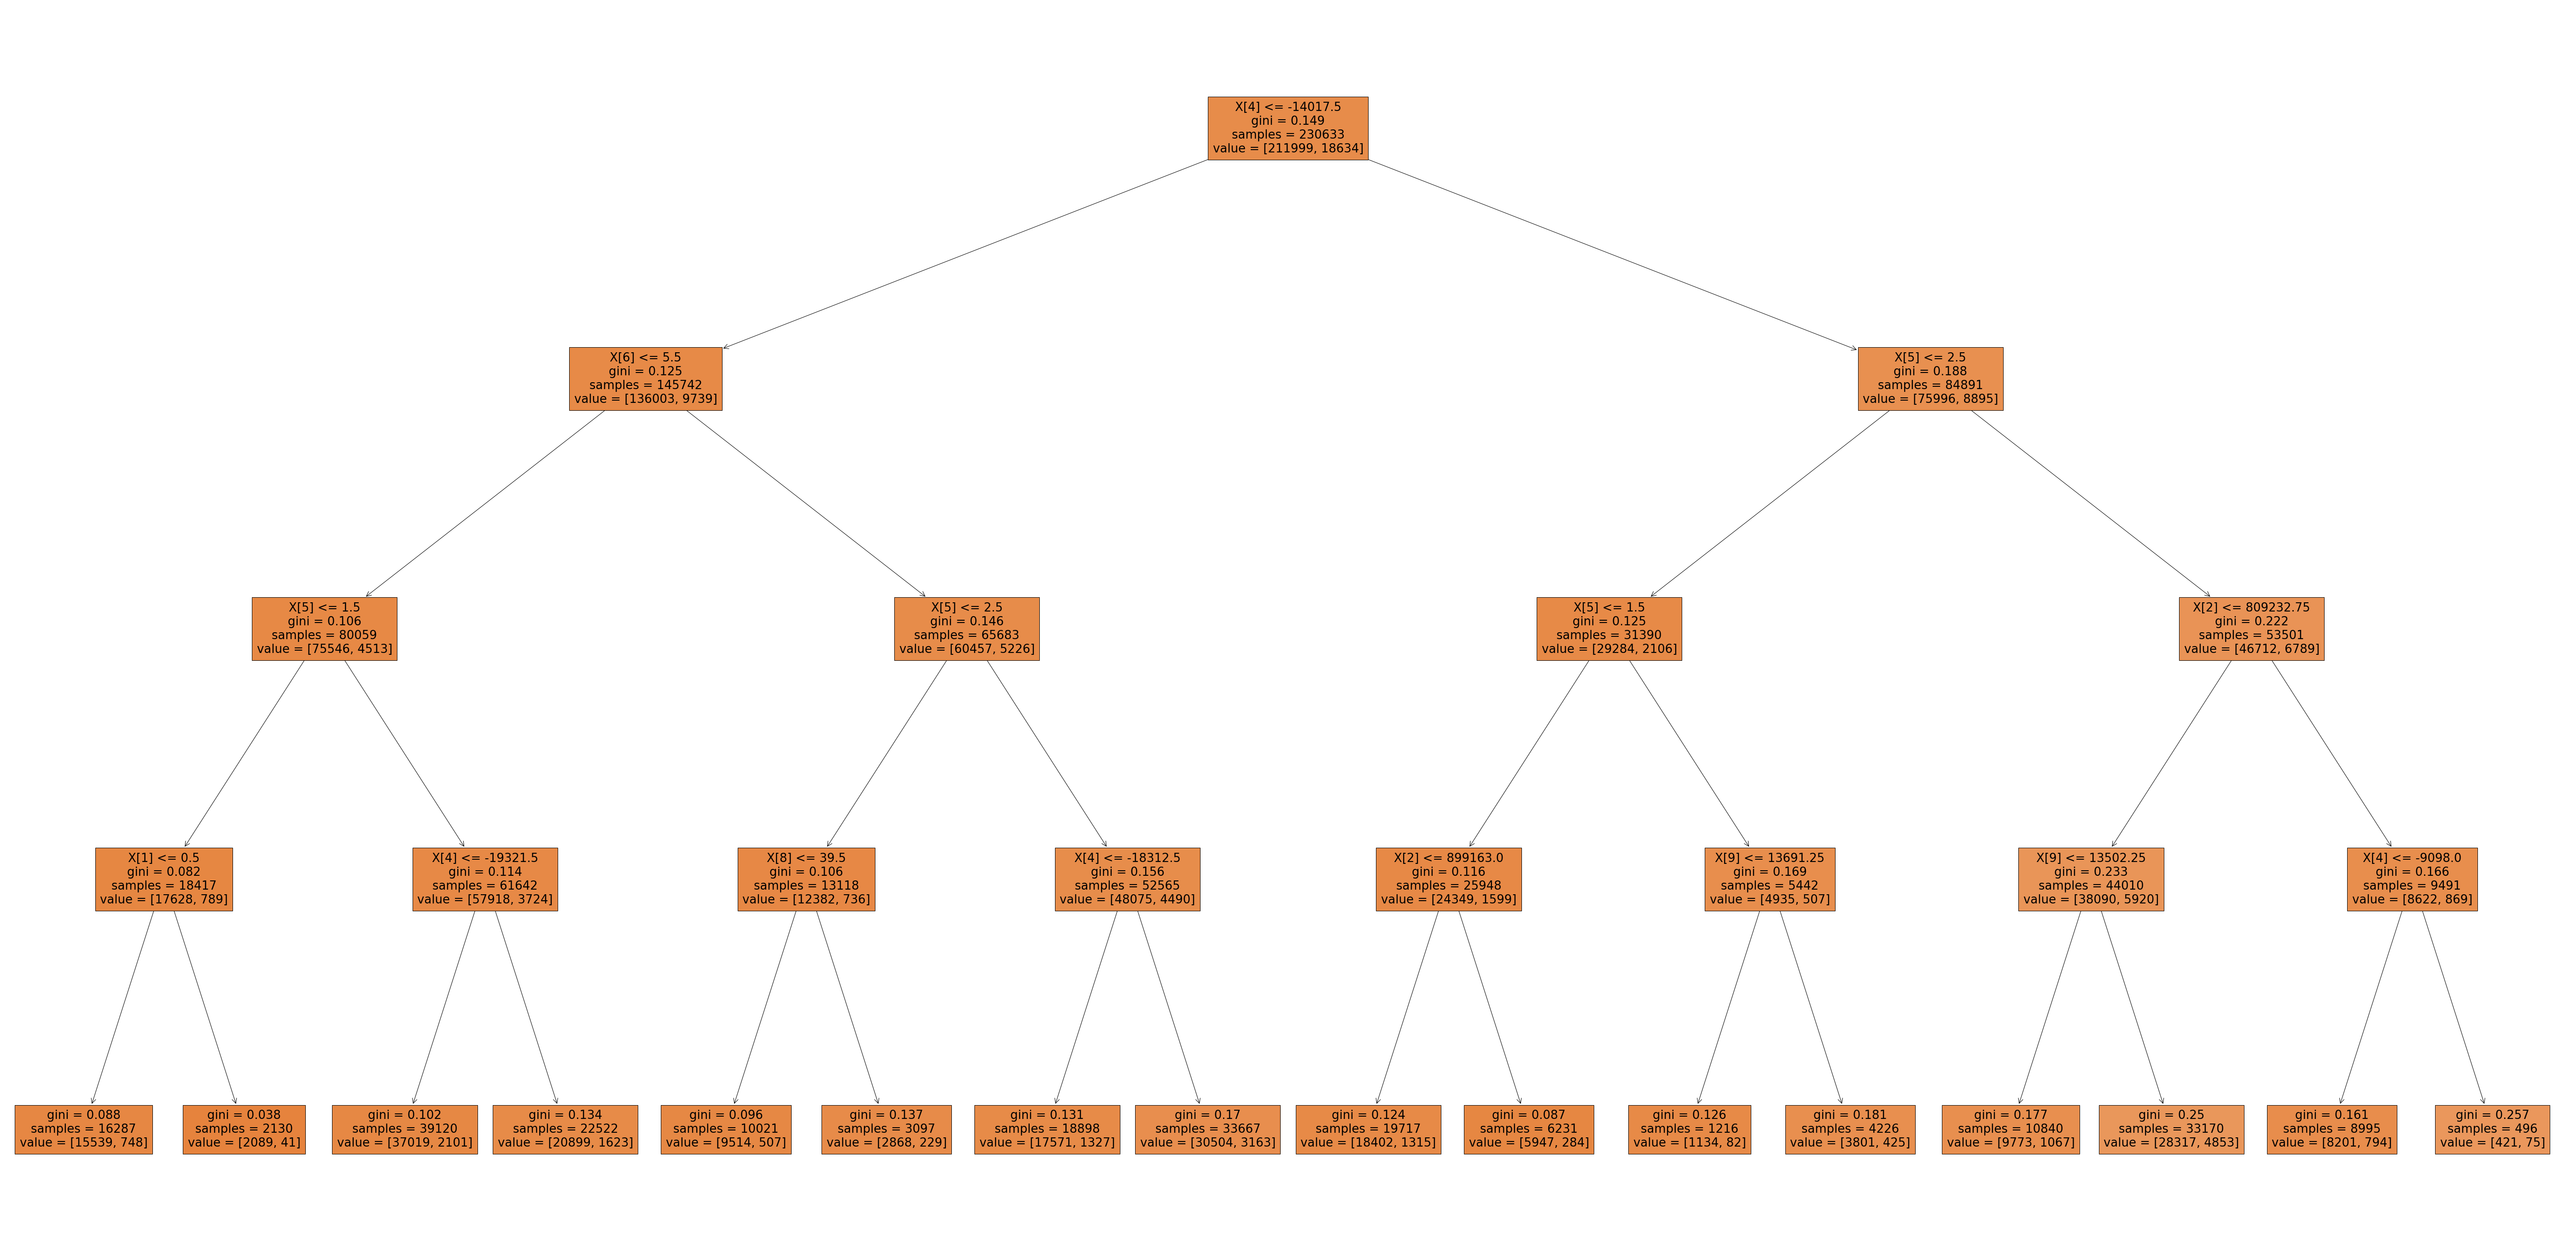

In [11]:
# Plotting the Decision Tree

plt.figure(figsize=(100,50))
tree.plot_tree(my_model, filled = True)


### Building a Random Forest and plot the variable importance chart from the Random Forest

#### Creating the Random Forest

In [29]:
# Splitting the dataset into training data and test data

rf1_train, rf1_test = train_test_split(df_clean, test_size = 0.25, random_state =42)

# Preparing the training dataset
rf1_train_input = df_clean.drop(['TARGET','SK_ID_CURR'], axis = 'columns')
rf1_train_target = df_clean[['TARGET']]

# Preparing the testing dataset

rf1_test_input = df_clean.drop(['TARGET','SK_ID_CURR'], axis = 'columns')
rf1_test_target = df_clean[['TARGET']]


In [82]:
# Creating the Random Forest

rf1_model = RandomForestClassifier(class_weight = 'balanced', criterion = 'gini', max_depth = 50, max_features = 10, n_estimators = 5)
rf1_model.fit(rf1_train_input, rf1_train_target.values.ravel())


RandomForestClassifier(class_weight='balanced', max_depth=50, max_features=10,
                       n_estimators=5)

##### Checking the Prediction Score

In [83]:
rf1_model.score(rf1_test_input, rf1_test_target.values.ravel())

0.9838379765276689

#### Variable Importance Chart

<AxesSubplot:ylabel='Variable'>

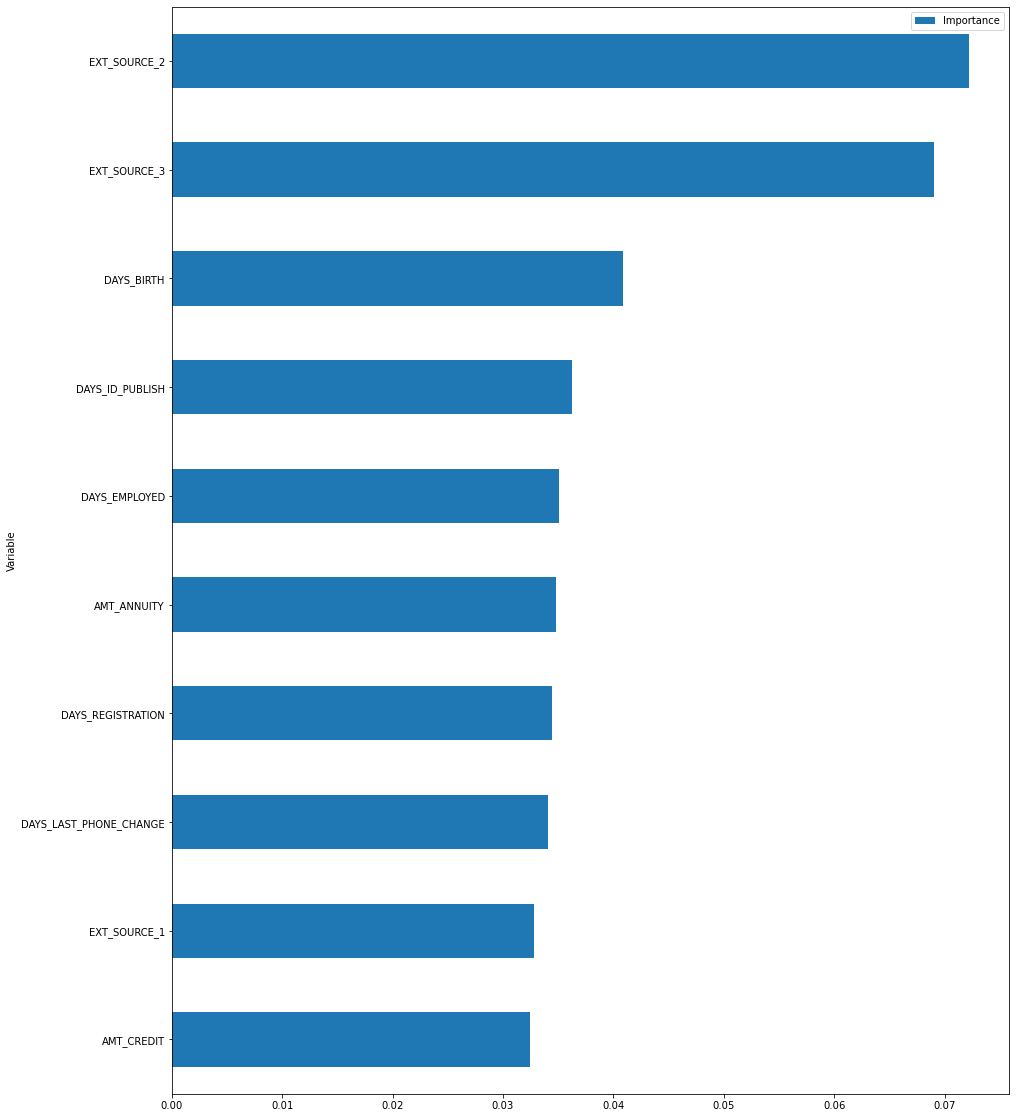

In [31]:
# Creating the variable importance chart

var_columns = [ c for c in rf1_train_input]
rf_var_imp = pd.DataFrame({'Variable': var_columns, 'Importance': rf1_model.feature_importances_}).sort_values(by='Importance', ascending= False).reset_index(drop=True) 
rf_var_imp[:10].sort_values('Importance').plot('Variable','Importance','barh', figsize =(15,20))    





#### Top 10 variables chosen in Module 1 

AMT_INCOME_TOTAL, NAME_CONTRACT_TYPE ,AMT_CREDIT, FLAG_OWN_CAR, DAYS_BIRTH, NAME_EDUCATION_TYPE, NAME_INCOME_TYPE, NAME_FAMILY_STATUS, ORGANIZATION_TYPE, AMT_ANNUITY

#### Top 10 variables chosen according to 'Variable Importance Chart'

EXT_SOURCE_2, EXT_SOURCE_3, DAYS_BIRTH, DAYS_ID_PUBLISH,DAYS_EMPLOYED,AMT_ANNUITY, DAYS_REGISTRATION, DAYS_LAST_PHONE_CHANGE, EXT_SOURCE_1, AMT_CREDIT

#### Common Variables

AMT_CREDIT, DAYS_BIRTH, AMT_ANNUITY

### Using only the top-ten variables from the variable importance plot, rebuilding the random forest and the single classification tree. Ploting the single tree.

#### Creating Decision Tree based on 'Variable Importance Chart'

##### New Variables :  EXT_SOURCE_2, EXT_SOURCE_3, DAYS_BIRTH, DAYS_ID_PUBLISH,DAYS_EMPLOYED,AMT_ANNUITY, DAYS_REGISTRATION, DAYS_LAST_PHONE_CHANGE, EXT_SOURCE_1, AMT_CREDIT


In [39]:
# Preparing the dataset based on variable importance chart

data = df_clean[['TARGET','EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'DAYS_ID_PUBLISH','DAYS_EMPLOYED','AMT_ANNUITY', 'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE', 'EXT_SOURCE_1', 'AMT_CREDIT']]



In [40]:
# Splitting the dataset into training data and test data

data_train, data_test = train_test_split(data, test_size = 0.25, random_state =42)

# Preparing the training dataset

data_train_input = data_train.drop(['TARGET'], axis = 'columns')
data_train_target = data_train[['TARGET']]

# Preparing the testing dataset

data_test_input = data_test.drop(['TARGET'], axis = 'columns')
data_test_target = data_test[['TARGET']]


In [62]:
# Fitting the Decision Tree

clf = tree.DecisionTreeClassifier(random_state = 42, max_depth = 4)
model = clf.fit(data_train_input, data_train_target)

#### Checking the prediction score

In [63]:
# Model prediction test ( Pruning the tree to max depth 4 as there is no increase in the prediction score)

model.score(data_test_input,data_test_target)

0.9194698093082546

#### Visualizing the Tree

[Text(2790.0, 2446.2, 'X[0] <= 0.377\ngini = 0.149\nsamples = 230633\nvalue = [211999, 18634]'),
 Text(1395.0, 1902.6, 'X[1] <= 0.378\ngini = 0.247\nsamples = 54757\nvalue = [46835, 7922]'),
 Text(697.5, 1359.0, 'X[0] <= 0.125\ngini = 0.323\nsamples = 25561\nvalue = [20387, 5174]'),
 Text(348.75, 815.3999999999999, 'X[2] <= -18211.5\ngini = 0.408\nsamples = 5927\nvalue = [4238, 1689]'),
 Text(174.375, 271.7999999999997, 'gini = 0.325\nsamples = 1360\nvalue = [1082, 278]'),
 Text(523.125, 271.7999999999997, 'gini = 0.427\nsamples = 4567\nvalue = [3156, 1411]'),
 Text(1046.25, 815.3999999999999, 'X[1] <= 0.0\ngini = 0.292\nsamples = 19634\nvalue = [16149, 3485]'),
 Text(871.875, 271.7999999999997, 'gini = 0.245\nsamples = 9773\nvalue = [8374, 1399]'),
 Text(1220.625, 271.7999999999997, 'gini = 0.334\nsamples = 9861\nvalue = [7775, 2086]'),
 Text(2092.5, 1359.0, 'X[0] <= 0.15\ngini = 0.171\nsamples = 29196\nvalue = [26448, 2748]'),
 Text(1743.75, 815.3999999999999, 'X[2] <= -19690.5\ngini

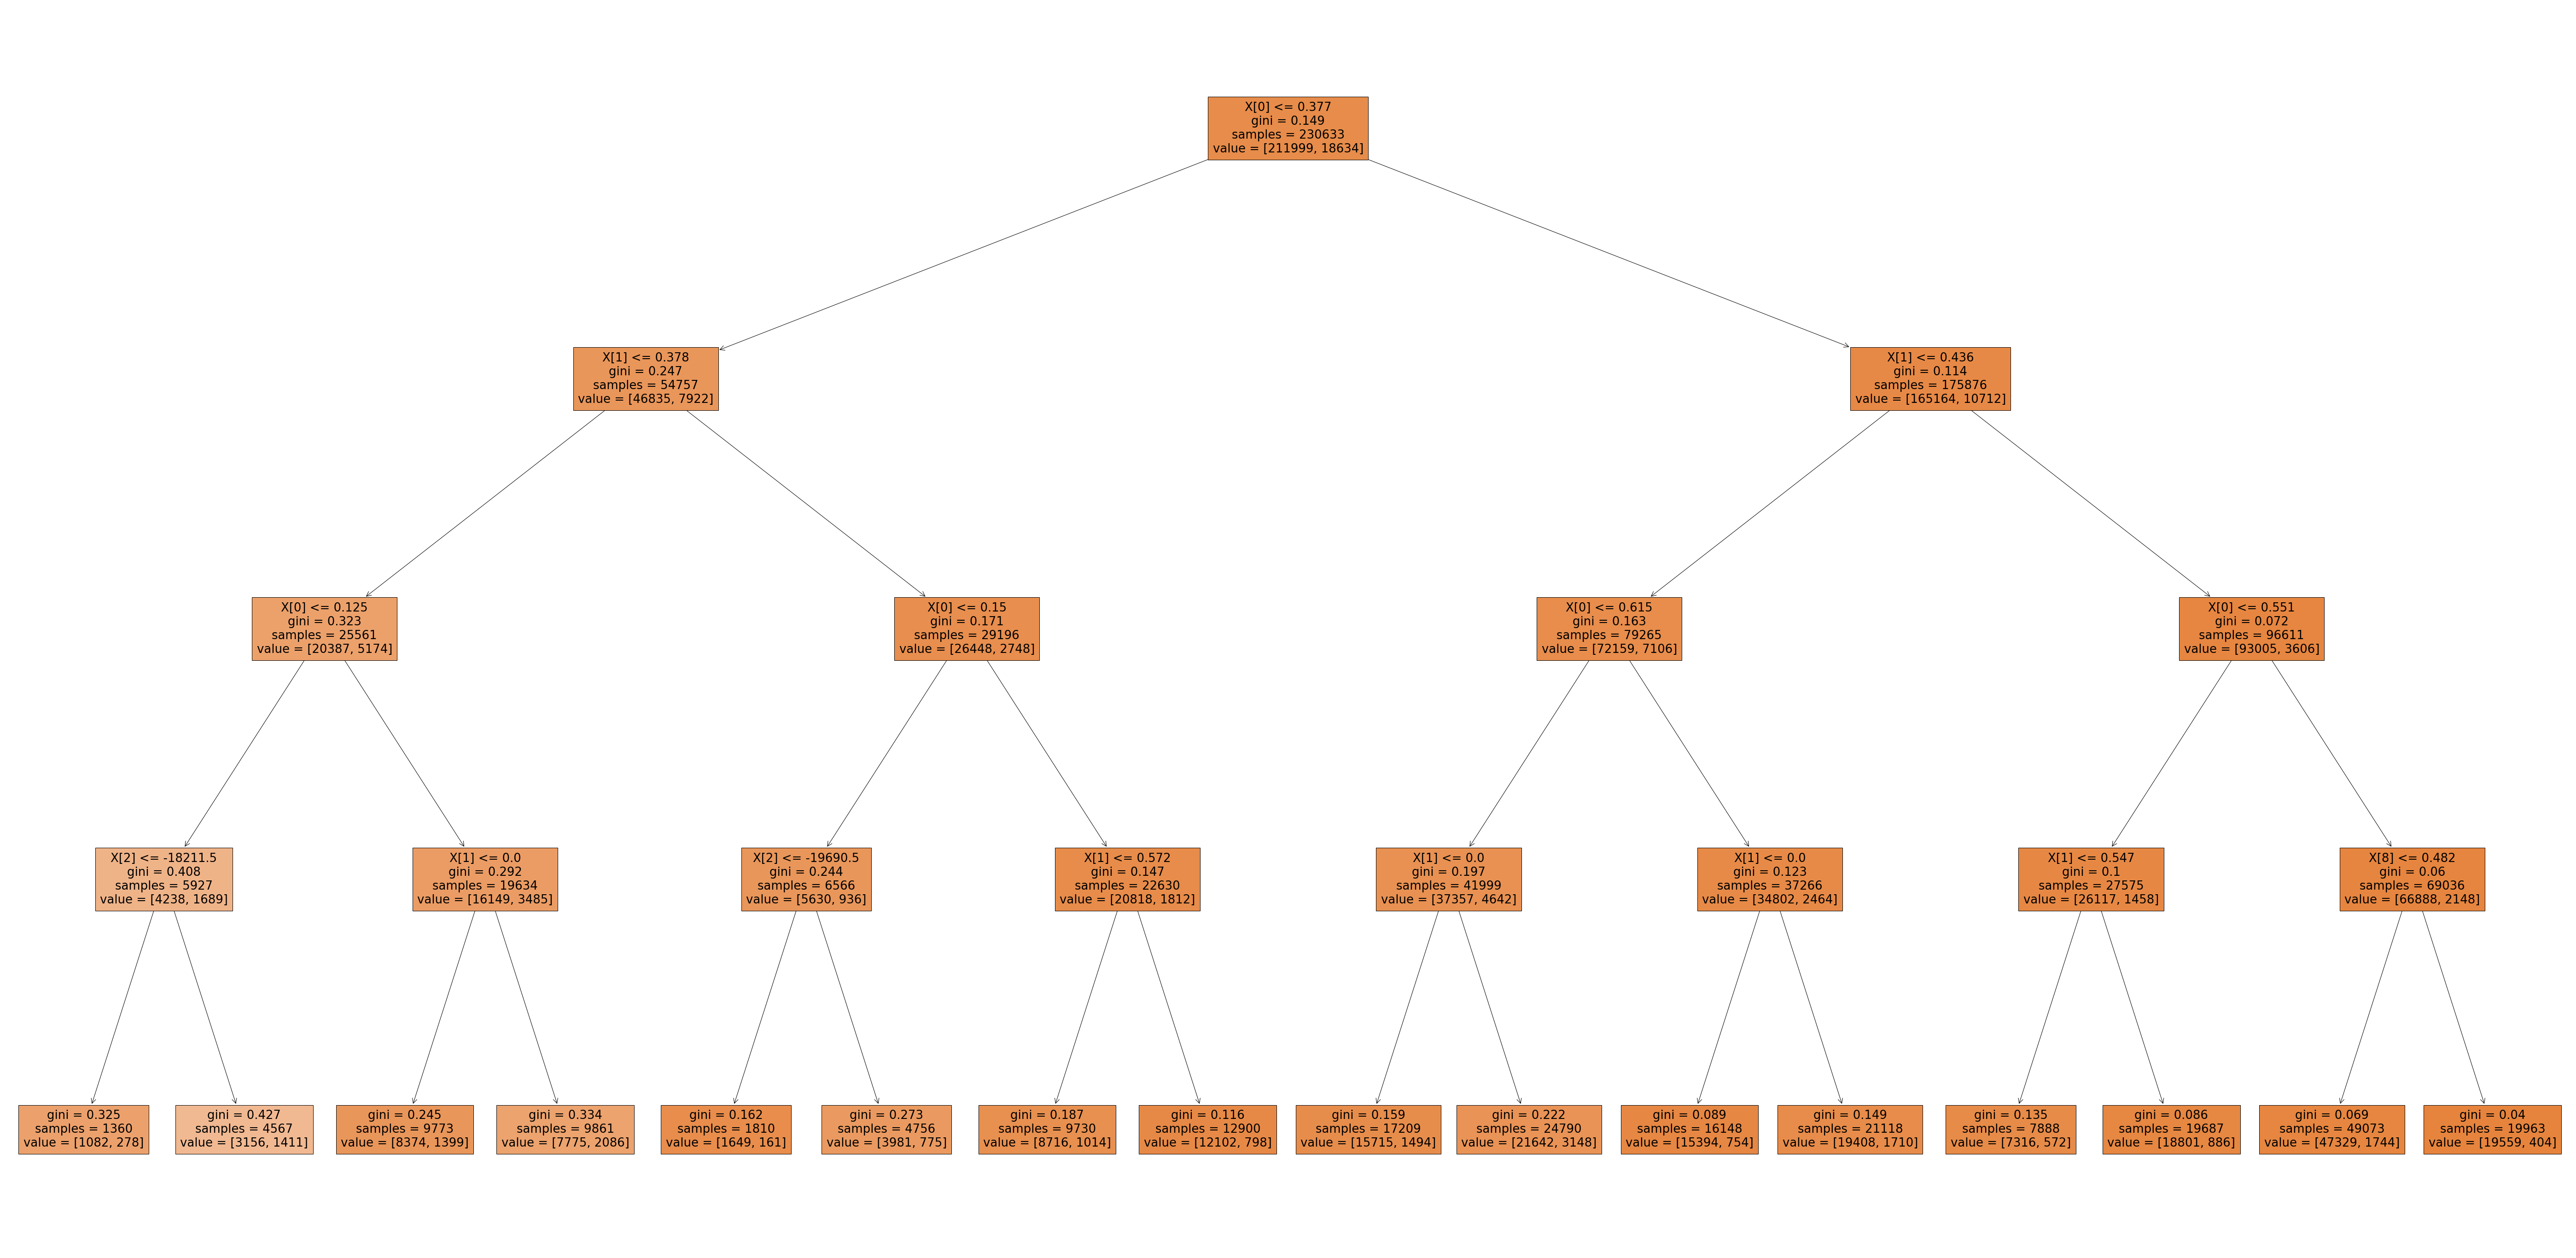

In [64]:
# Plotting the Decision Tree

plt.figure(figsize=(100,50))
tree.plot_tree(model, filled = True)


#### Creating the Random Forest based on the "Variable Importance Chart"

In [65]:
# Splitting the dataset into training data and test data

rf_train, rf_test = train_test_split(data, test_size = 0.25, random_state =42)

# Preparing the training dataset
rf_train_input = data.drop(['TARGET'], axis = 'columns')
rf_train_target = data[['TARGET']]

# Preparing the testing dataset

rf_test_input = data.drop(['TARGET'], axis = 'columns')
rf_test_target = data[['TARGET']]


In [84]:
# Creating the Random Forest

rf_model = RandomForestClassifier(class_weight = 'balanced', criterion = 'gini', max_depth = 50, max_features = 10, n_estimators = 5)
rf_model.fit(rf_train_input, rf_train_target.values.ravel())



RandomForestClassifier(class_weight='balanced', max_depth=50, max_features=10,
                       n_estimators=5)

##### Checking the Prediction Score

In [85]:
rf_model.score(rf_test_input, rf_test_target.values.ravel())

0.9837241594609624

### Comparing the accuracy and generalization of the two sets of classification trees and random forests. 

###### Comparision of the Decision Tree

There were no difference in the prediction score between the models with the variables chosen from Module 1 and the model with variables using the importance chart. For both the models I was able to achieve a prediction score of '0.9194698093082546'( with max-depth = 4). This was achieved by pruning and fine-tuning the max-depth parameter. Beyond max-depth 7 the prediction score started to drop. As an experiment, I removed the max-depth parameter and allowed the tree to grow to its full potential ( this took a lot of time to process and my computer almost got hung). With the full grown tree the prediction dropped to around 0.73 as the model got over-fitted and there was less generalization. This brought high bias and high variance.       

###### Comparision of the Random Forest

The random forest with all the variables produced a very slightly result than the random forest with the top 10 most importance variables. The random forest with all the variables scored '0.9838379765276689' with max-depth = 50. The random forest with the top 10 variables produced a score of '0.9837241594609624'. Random forest is used to avoid over-fitting an inherent problem with decision trees. 
The availability of the large set of variables would have produced more room for generalization to produce a slightly better prediction score for the model with all the variables. 
As an experiment, I removed the max-depth parameter and I was able to achieve a very high score of .9976 ( but it took a lot of time to fit the tree).